<a href="https://colab.research.google.com/github/Adrija1503/Soft-Computing/blob/main/MOBILEPRICES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')
df_train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df_train.drop(columns=['price_range'])
y = df_train['price_range']

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns
feature_importances_scaled = feature_importances * 100

In [ ]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_scaled})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
print(importance_df)

          Feature  Importance
13            ram   49.416339
0   battery_power    7.460184
12       px_width    5.744761
11      px_height    5.563956
8       mobile_wt    3.895964
6      int_memory    3.469866
16      talk_time    3.034681
15           sc_w    2.789211
10             pc    2.745886
14           sc_h    2.654661
2     clock_speed    2.606854
4              fc    2.427436
7           m_dep    2.329284
9         n_cores    2.203571
18   touch_screen    0.662019
3        dual_sim    0.644839
1            blue    0.631160
19           wifi    0.625484
5          four_g    0.623685
17        three_g    0.470159


In [ ]:
train=df_train.drop(['touch_screen','dual_sim','blue','wifi','four_g','three_g'],axis=1)
test=df_test.drop(['touch_screen','dual_sim','blue','wifi','four_g','three_g','id'],axis=1)

train.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [ ]:
X = train.drop(columns=['price_range'])
y = train['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
print(knn.predict(X_test))

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 2 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 2 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 2 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2 1 3 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 0 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 0 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 0 3 2 

In [ ]:
print(y_test)

1860    0
353     2
1333    1
905     3
1289    1
       ..
148     2
1554    1
1956    0
925     1
942     0
Name: price_range, Length: 600, dtype: int64


In [ ]:
print(knn.score(X_test, y_test))

0.925


In [ ]:
test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1043,1.8,14,5,0.1,193,3,16,226,1412,3476,12,7,2
1,841,0.5,4,61,0.8,191,5,12,746,857,3895,6,0,7
2,1807,2.8,1,27,0.9,186,3,4,1270,1366,2396,17,10,10
3,1546,0.5,18,25,0.5,96,8,20,295,1752,3893,10,0,7
4,1434,1.4,11,49,0.5,108,6,18,749,810,1773,15,8,7


In [ ]:
knn.predict(test)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

[[146   5   0   0]
 [  6 135   5   0]
 [  0  14 130   4]
 [  0   0  11 144]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.88      0.88       148
           3       0.97      0.93      0.95       155

    accuracy                           0.93       600
   macro avg       0.93      0.92      0.92       600
weighted avg       0.93      0.93      0.93       600



In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9557142857142857
Test Accuracy: 0.925


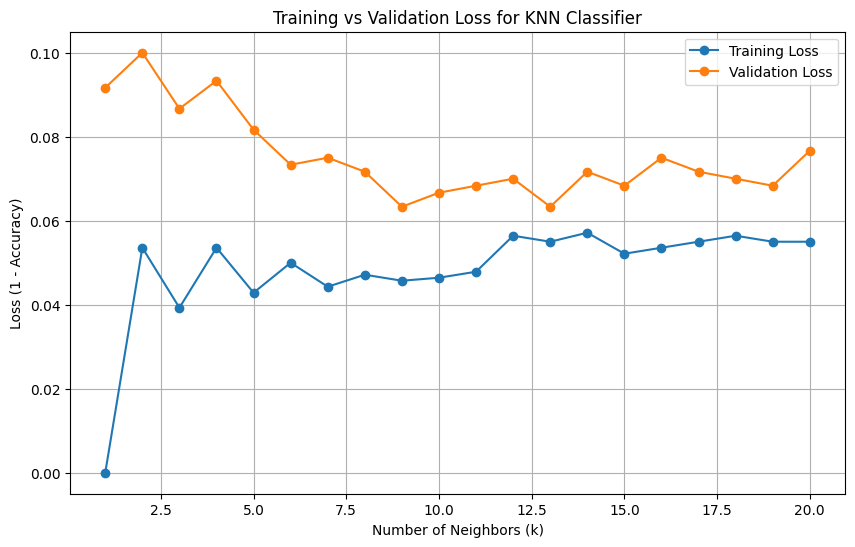

In [ ]:
train_losses = []
val_losses = []

# Range of k values to test
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_loss = 1 - train_accuracy
    train_losses.append(train_loss)

    # Predict on test data
    y_test_pred = knn.predict(X_test)
    val_accuracy = accuracy_score(y_test, y_test_pred)
    val_loss = 1 - val_accuracy
    val_losses.append(val_loss)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_losses, label='Training Loss', marker='o')
plt.plot(k_values, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss (1 - Accuracy)')
plt.title('Training vs Validation Loss for KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

[[143   8   0   0]
 [  8 126  12   0]
 [  0  14 122  12]
 [  0   0  15 140]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.85      0.86      0.86       146
           2       0.82      0.82      0.82       148
           3       0.92      0.90      0.91       155

    accuracy                           0.89       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.89      0.89      0.89       600



In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.885


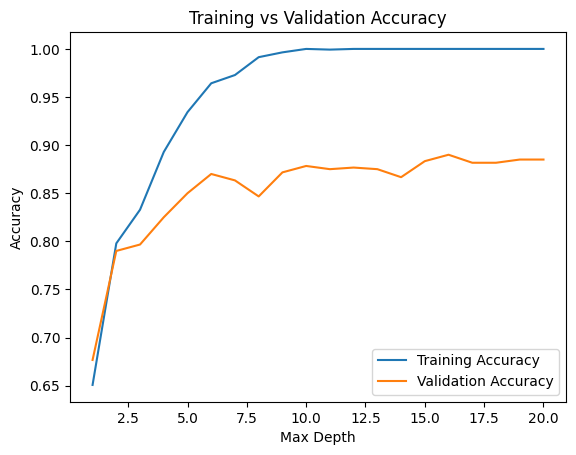

In [ ]:
train_accuracies = []
test_accuracies = []
max_depths = range(1, 21)  # Different depths for Random Forest

for depth in max_depths:
    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=depth, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions on both training and test sets
    y_pred_train = rf_classifier.predict(X_train)
    y_pred_test = rf_classifier.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot training and test accuracies
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()